In [20]:
import csv
from datetime import datetime
from dateutil import parser

# Function to extract the time part of a date string
def get_time(date_str):
    dt = parser.parse(date_str)
    return dt.strftime("%I:%M %p")

# Read the CSV file

input_file = "crimes2001ToPresent.csv"
output_file = "endingData.csv"

data = []

with open(input_file, "r") as infile:
    reader = csv.DictReader(infile)
    for row in reader:
        data.append(row)

# Sort the data based on the "Date" column
sorted_data = sorted(data, key=lambda x: get_time(x["Date"]))

# Write the sorted data to the output file
with open(output_file, "w", newline="") as outfile:
    fieldnames = data[0].keys()
    writer = csv.DictWriter(outfile, fieldnames=fieldnames)
    writer.writeheader()
    for row in sorted_data:
        writer.writerow(row)

print("CSV file sorted based on AM and PM times and saved to", output_file)


CSV file sorted based on AM and PM times and saved to endingData.csv


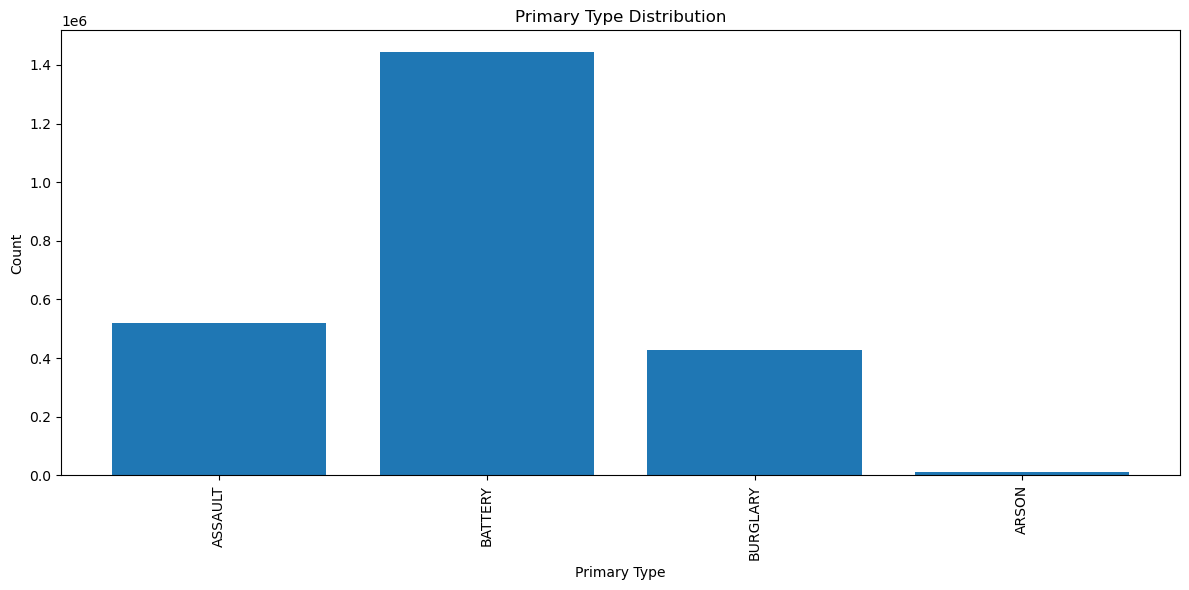

Bar chart created and displayed.


In [30]:
import csv
import matplotlib.pyplot as plt
from collections import Counter

# Read the sorted CSV file
input_file = "endingData.csv"

primary_type_counts = Counter()

with open(input_file, "r") as infile:
    reader = csv.DictReader(infile)
    for row in reader:
        primary_type = row["Primary Type"]
        primary_type_counts[primary_type] += 1

# Create the bar chart
primary_types, count = zip(*primary_type_counts.items())

plt.figure(figsize=(12, 6))
plt.bar(primary_types, count)
plt.xlabel("Primary Type")
plt.ylabel("Count")
plt.title("Primary Type Distribution")
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()

# Show or save the chart
plt.show()  # To display the chart
# plt.savefig("primary_type_bar_chart.png")  # To save the chart as an image

print("Bar chart created and displayed.")


In [ ]:
# Dependencies
import pandas as pd
import numpy as np
import requests
import json

input_file = "crimes2001ToPresent.csv"
output_file = "endingData.csv"

# Import API key
from config import chicagoCrime_key

api_url = chicagoCrime_key  # Replace with the actual API endpoint

# Make a GET request to the API
response = requests.get(api_url)


# Check if the request was successful (status code 200)
if response.status_code == 200:
    # Display the headers clearly
    print("Response Headers:")
    for key, value in response.headers.items():
        print(f"{key}: {value}")
    print("\n")

    # Display the data (assuming the response contains JSON data)
    data = response.json()  # You can use .text for non-JSON data

    # Pretty-print the JSON data
    import json
    print("Data from the API:")
    print(json.dumps(data, indent=4))
else:
    # If the request was not successful, print an error message
    print(f"Request failed with status code {response.status_code}")

Response Headers:
Server: nginx
Date: Fri, 20 Oct 2023 00:14:47 GMT
Content-Type: application/json;charset=utf-8
Transfer-Encoding: chunked
Connection: keep-alive
Access-Control-Allow-Origin: *
ETag: "YWxwaGEuMTAyNDNfMTBfMjI2MjI2aUdZMVg5V2d3aXNiVU8yU2FXdmt3d29KZDQ---gziqpuKvRJ5XdwAjRbZJ_QU43aYiz7A--gzip--gzip"
X-SODA2-Fields: ["id","case_number","date","block","iucr","primary_type","description","location_description","arrest","domestic","beat","district","ward","community_area","fbi_code","x_coordinate","y_coordinate","year","updated_on","latitude","longitude","location",":@computed_region_awaf_s7ux",":@computed_region_6mkv_f3dw",":@computed_region_vrxf_vc4k",":@computed_region_bdys_3d7i",":@computed_region_43wa_7qmu",":@computed_region_rpca_8um6",":@computed_region_d9mm_jgwp",":@computed_region_d3ds_rm58",":@computed_region_8hcu_yrd4"]
X-SODA2-Types: ["number","text","floating_timestamp","text","text","text","text","text","boolean","boolean","text","text","number","text","text","numb

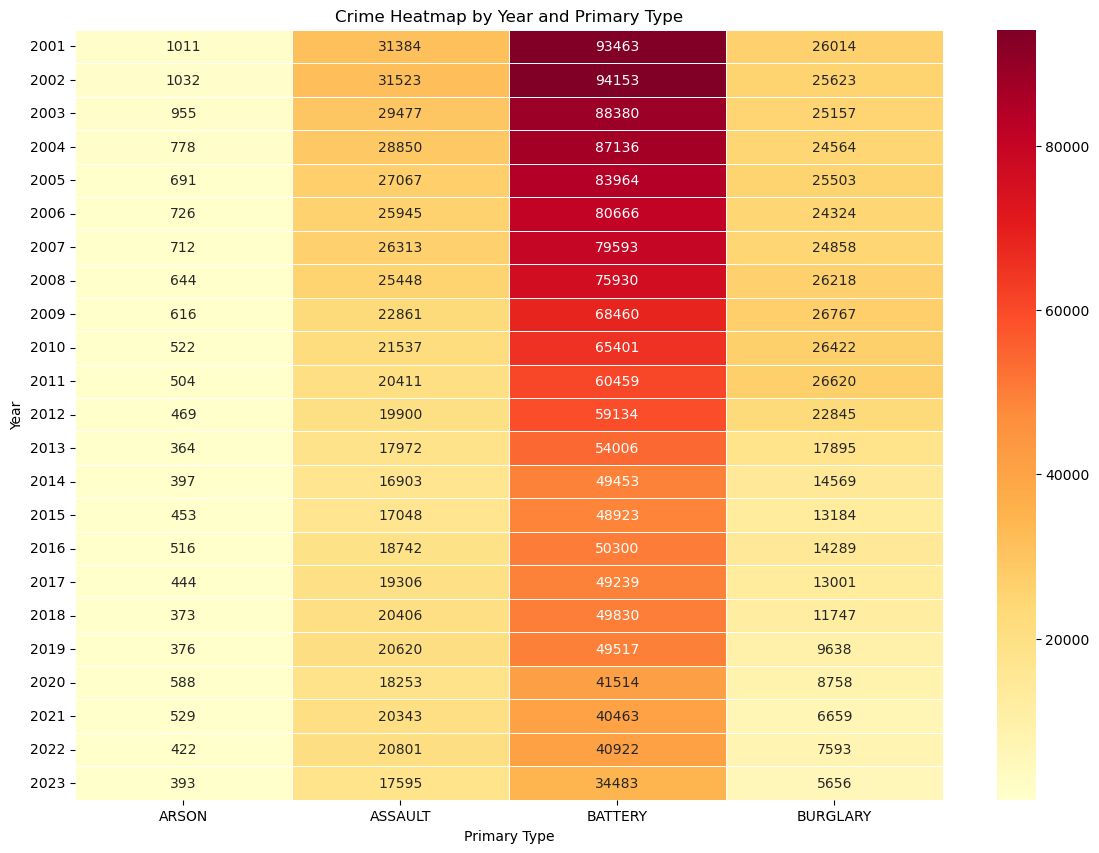

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Read the CSV file
data = pd.read_csv('endingData.csv')

# Step 3: Preprocess the data
heatmap_data = data.groupby(['Year', 'Primary Type']).size().reset_index(name='Count')

# Pivot the data to create a matrix for the heatmap
heatmap_matrix = heatmap_data.pivot(index='Year', columns='Primary Type', values='Count')

# Step 4: Create the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_matrix, cmap='YlOrRd', linewidths=0.5, annot=True, fmt='d')
plt.title('Crime Heatmap by Year and Primary Type')
plt.xlabel('Primary Type')
plt.ylabel('Year')
plt.show()


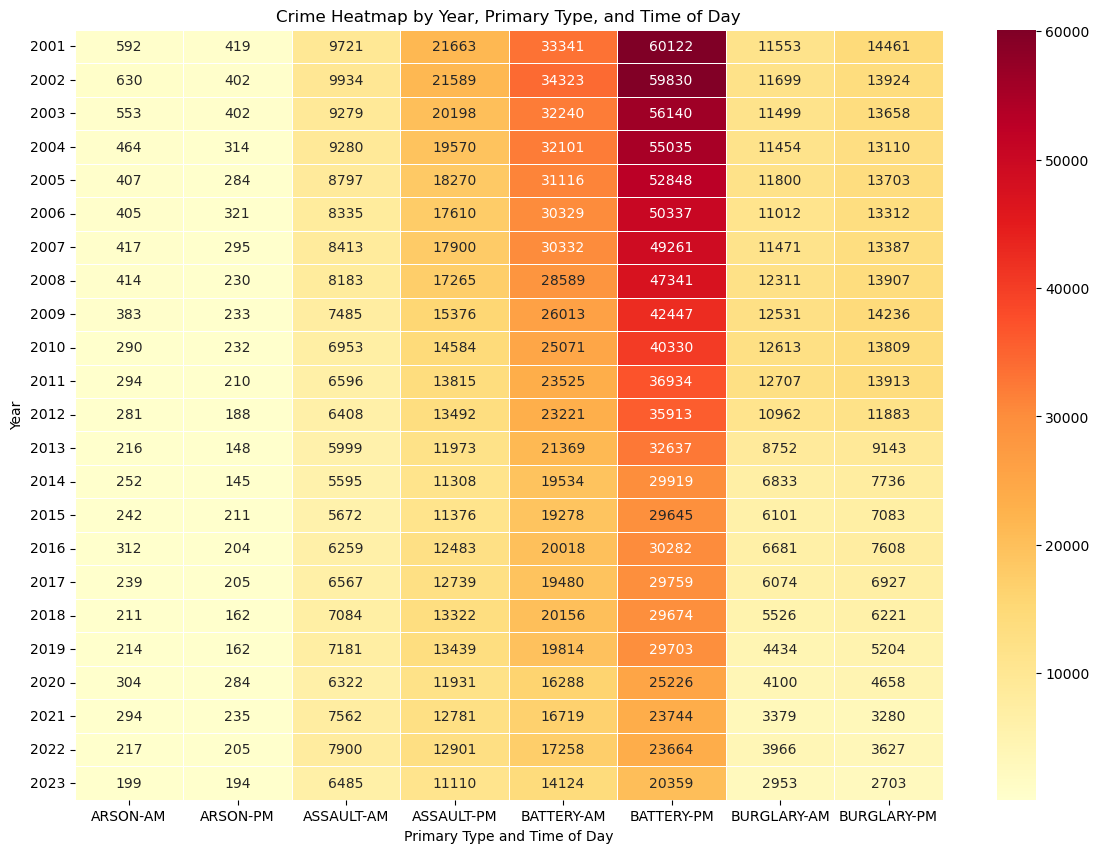

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Read the CSV file
data = pd.read_csv('endingData.csv')

# Step 3: Preprocess the data
# Extract the time of day (AM/PM) from the "Date" column
data['Time of Day'] = data['Date'].str[-2:]  # Extract the last 2 characters from the Date column

# Group the data by "Year," "Primary Type," and "Time of Day" and count occurrences
heatmap_data = data.groupby(['Year', 'Primary Type', 'Time of Day']).size().reset_index(name='Count')

# Pivot the data to create a 3D matrix for the heatmap
heatmap_matrix = heatmap_data.pivot_table(index='Year', columns=['Primary Type', 'Time of Day'], values='Count', aggfunc='sum')

# Step 4: Create the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_matrix, cmap='YlOrRd', linewidths=0.5, annot=True, fmt='d')
plt.title('Crime Heatmap by Year, Primary Type, and Time of Day')
plt.xlabel('Primary Type and Time of Day')
plt.ylabel('Year')
plt.show()


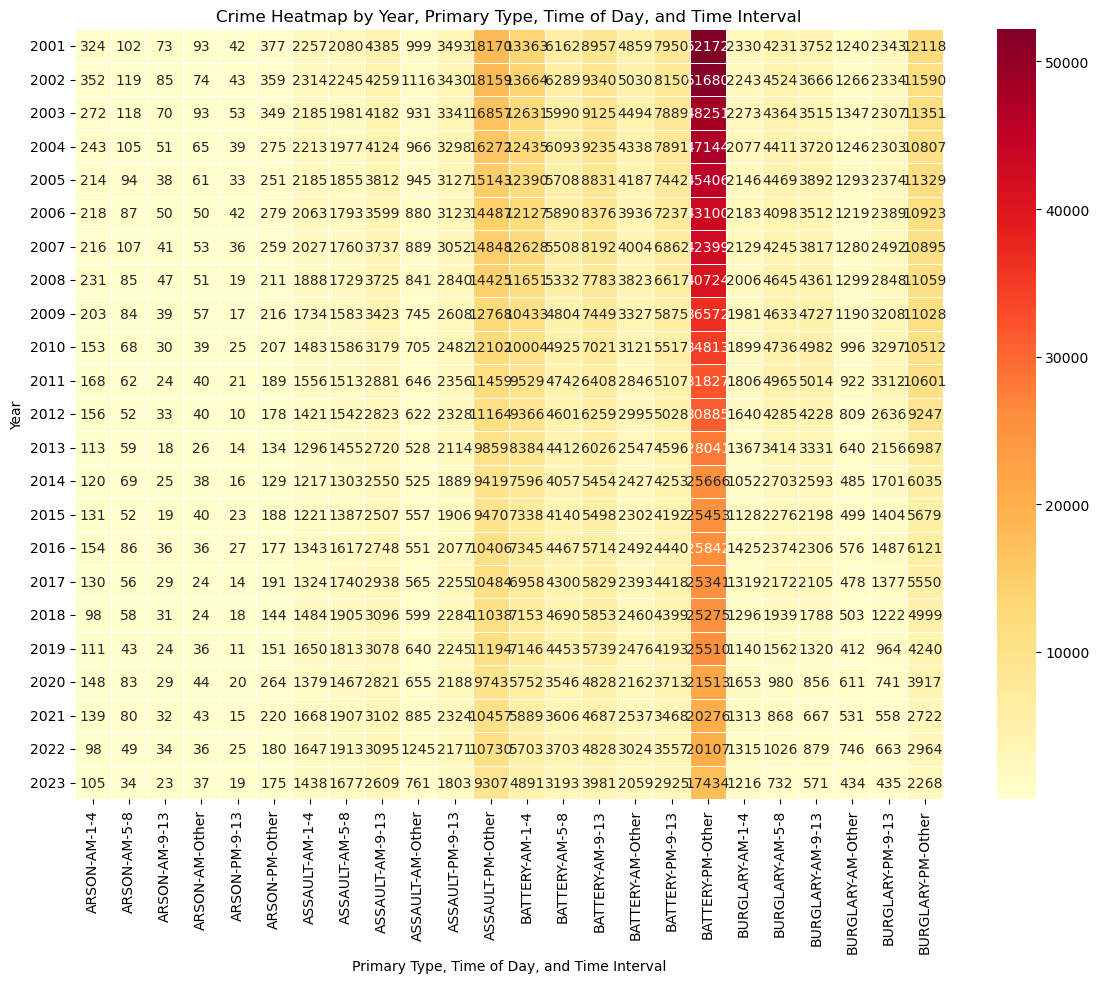

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Read the CSV file
data = pd.read_csv('endingData.csv')

# Step 3: Preprocess the data
# Extract the time of day (AM/PM) from the "Date" column
data['Time of Day'] = data['Date'].str[-2:]  # Extract the last 2 characters from the Date column

# Define custom time intervals
def assign_time_interval(hour):
    if 1 <= hour <= 4:
        return '1-4'
    elif 5 <= hour <= 8:
        return '5-8'
    elif 9 <= hour <= 13:
        return '9-13'
    else:
        return 'Other'

# Extract the hour from the "Date" column and apply the custom intervals
data['Hour'] = pd.to_datetime(data['Date']).dt.hour
data['Time Interval'] = data['Hour'].apply(assign_time_interval)

# Group the data by "Year," "Primary Type," "Time of Day," and "Time Interval" and count occurrences
heatmap_data = data.groupby(['Year', 'Primary Type', 'Time of Day', 'Time Interval']).size().reset_index(name='Count')

# Pivot the data to create a 4D matrix for the heatmap
heatmap_matrix = heatmap_data.pivot_table(index='Year', columns=['Primary Type', 'Time of Day', 'Time Interval'], values='Count', aggfunc='sum')

# Step 4: Create the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_matrix, cmap='YlOrRd', linewidths=0.5, annot=True, fmt='d')
plt.title('Crime Heatmap by Year, Primary Type, Time of Day, and Time Interval')
plt.xlabel('Primary Type, Time of Day, and Time Interval')
plt.ylabel('Year')
plt.show()


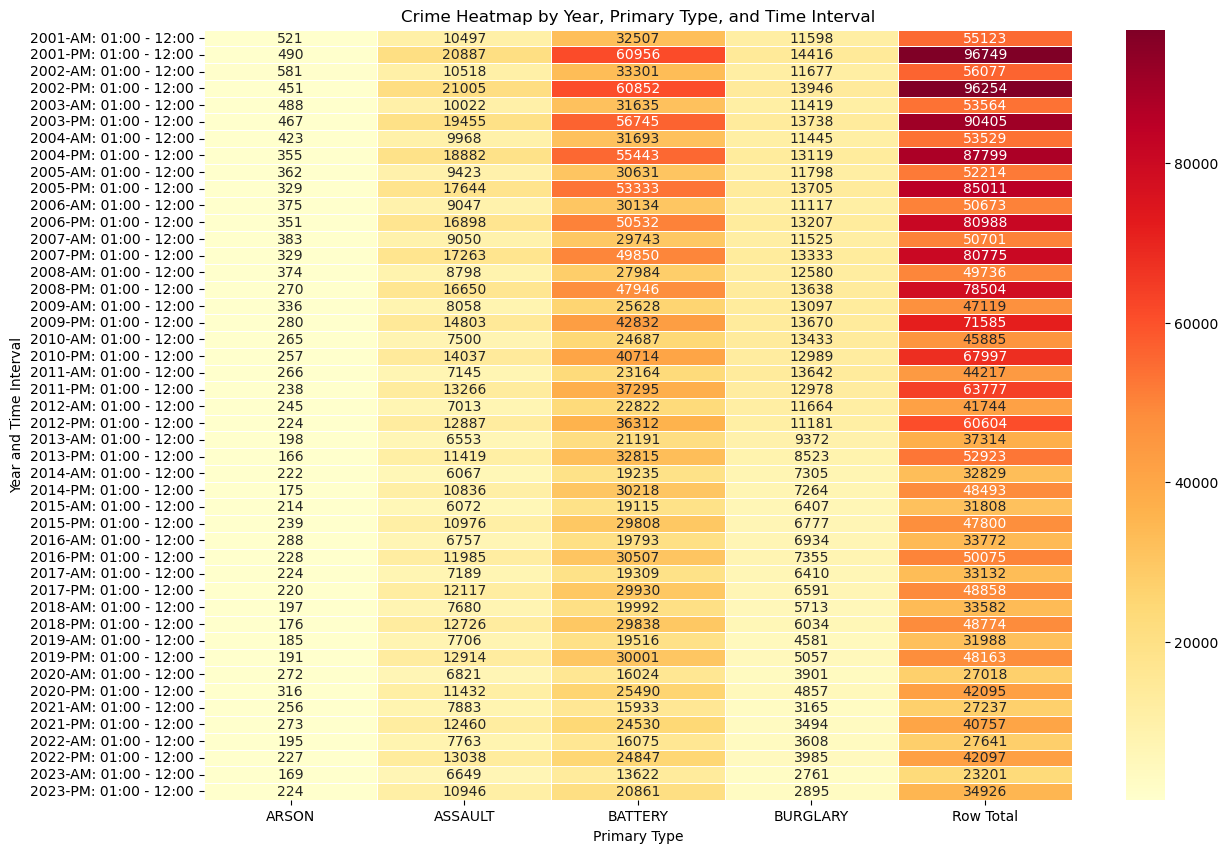

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Read the CSV file
data = pd.read_csv('endingData.csv')

# Step 3: Preprocess the data
# Extract the hour from the "Date" column
data['Hour'] = pd.to_datetime(data['Date']).dt.hour

# Define time intervals and specify the desired order
time_interval_order = ['AM: 01:00 - 12:00', 'PM: 01:00 - 12:00']

def get_time_interval(hour):
    if 1 <= hour <= 12:
        return 'AM: 01:00 - 12:00'
    else:
        return 'PM: 01:00 - 12:00'

data['Time Interval'] = data['Hour'].apply(get_time_interval)
data['Time Interval'] = pd.Categorical(data['Time Interval'], categories=time_interval_order, ordered=True)

# Group the data by "Year," "Primary Type," "Time Interval" and count occurrences
heatmap_data = data.groupby(['Year', 'Primary Type', 'Time Interval']).size().reset_index(name='Count')

# Pivot the data to create a 3D matrix for the heatmap
heatmap_matrix = heatmap_data.pivot_table(index=['Year', 'Time Interval'], columns='Primary Type', values='Count', aggfunc='sum')

# Calculate row totals and add them to the heatmap_matrix
heatmap_matrix['Row Total'] = heatmap_matrix.sum(axis=1)

# Step 4: Create the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_matrix, cmap='YlOrRd', linewidths=0.5, annot=True, fmt='d', cbar=True)
plt.title('Crime Heatmap by Year, Primary Type, and Time Interval')
plt.xlabel('Primary Type')
plt.ylabel('Year and Time Interval')
plt.show()


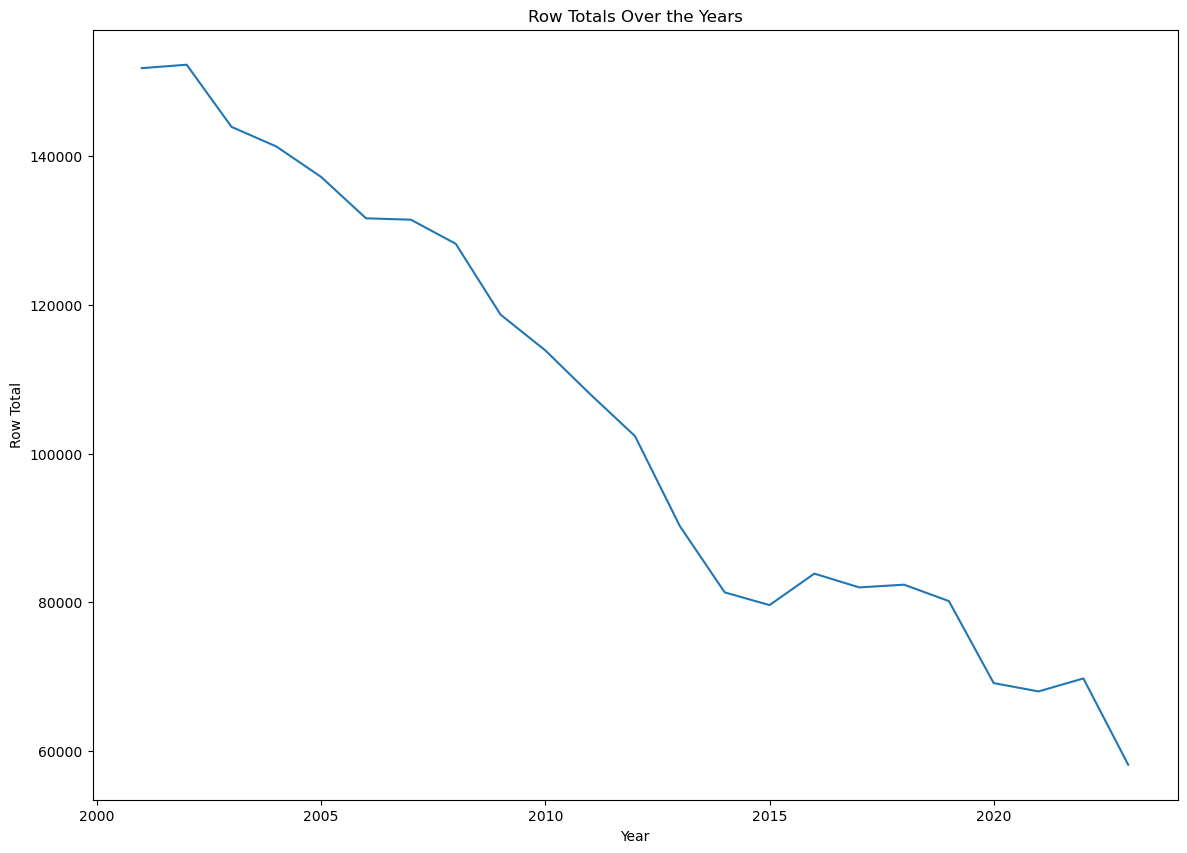

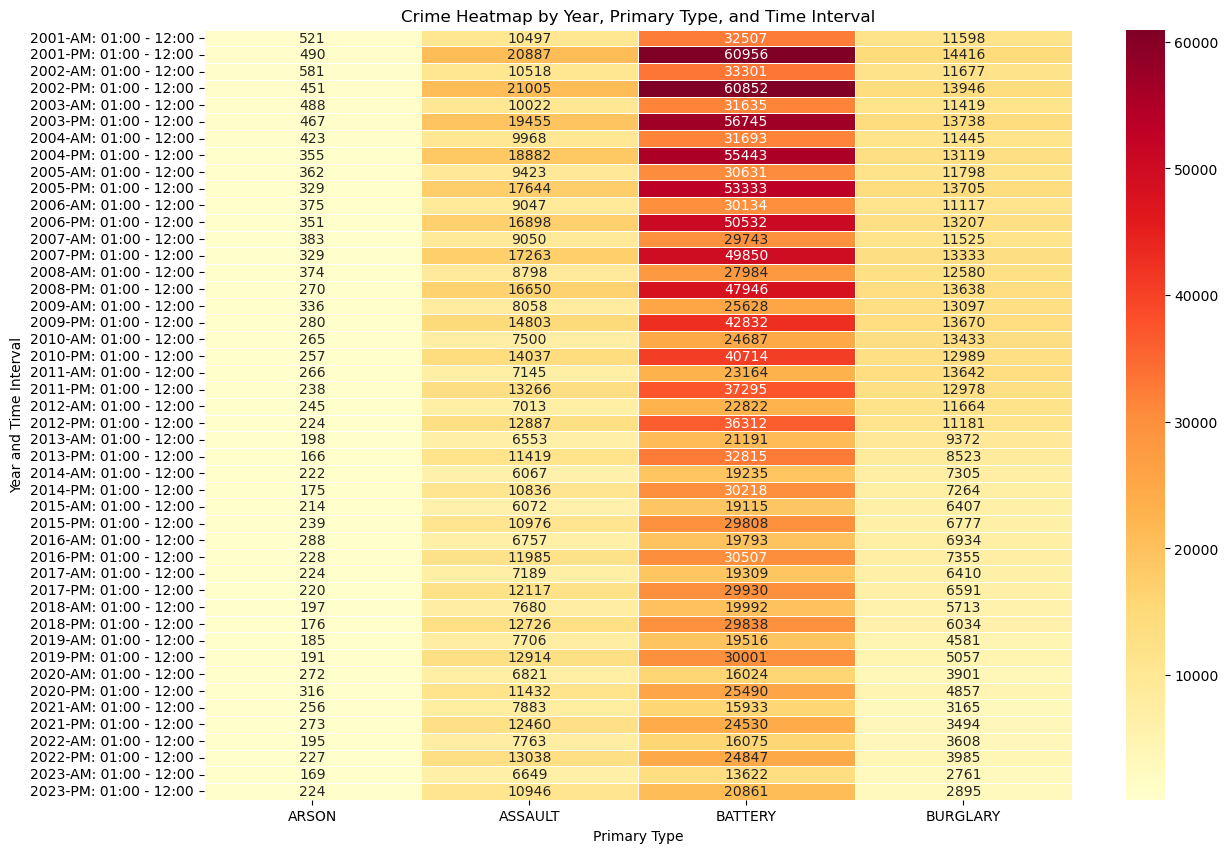

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Read the CSV file
data = pd.read_csv('endingData.csv')

# Step 3: Preprocess the data
# Extract the hour from the "Date" column
data['Hour'] = pd.to_datetime(data['Date']).dt.hour

# Define time intervals and specify the desired order
time_interval_order = ['AM: 01:00 - 12:00', 'PM: 01:00 - 12:00']

def get_time_interval(hour):
    if 1 <= hour <= 12:
        return 'AM: 01:00 - 12:00'
    else:
        return 'PM: 01:00 - 12:00'

data['Time Interval'] = data['Hour'].apply(get_time_interval)
data['Time Interval'] = pd.Categorical(data['Time Interval'], categories=time_interval_order, ordered=True)

# Group the data by "Year," "Primary Type," "Time Interval" and count occurrences
heatmap_data = data.groupby(['Year', 'Primary Type', 'Time Interval']).size().reset_index(name='Count')

# Pivot the data to create a 3D matrix for the heatmap
heatmap_matrix = heatmap_data.pivot_table(index=['Year', 'Time Interval'], columns='Primary Type', values='Count', aggfunc='sum')

# Calculate row totals and add them to the heatmap_matrix
heatmap_matrix['Row Total'] = heatmap_matrix.sum(axis=1)

# Create a line graph of row totals over the years
line_data = heatmap_matrix.groupby('Year')['Row Total'].sum().reset_index()

plt.figure(figsize=(14, 10))
sns.lineplot(data=line_data, x='Year', y='Row Total')
plt.title('Row Totals Over the Years')
plt.xlabel('Year')
plt.ylabel('Row Total')
plt.show()

# Create the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_matrix.drop(columns='Row Total'), cmap='YlOrRd', linewidths=0.5, annot=True, fmt='d', cbar=True)
plt.title('Crime Heatmap by Year, Primary Type, and Time Interval')
plt.xlabel('Primary Type')
plt.ylabel('Year and Time Interval')
plt.show()


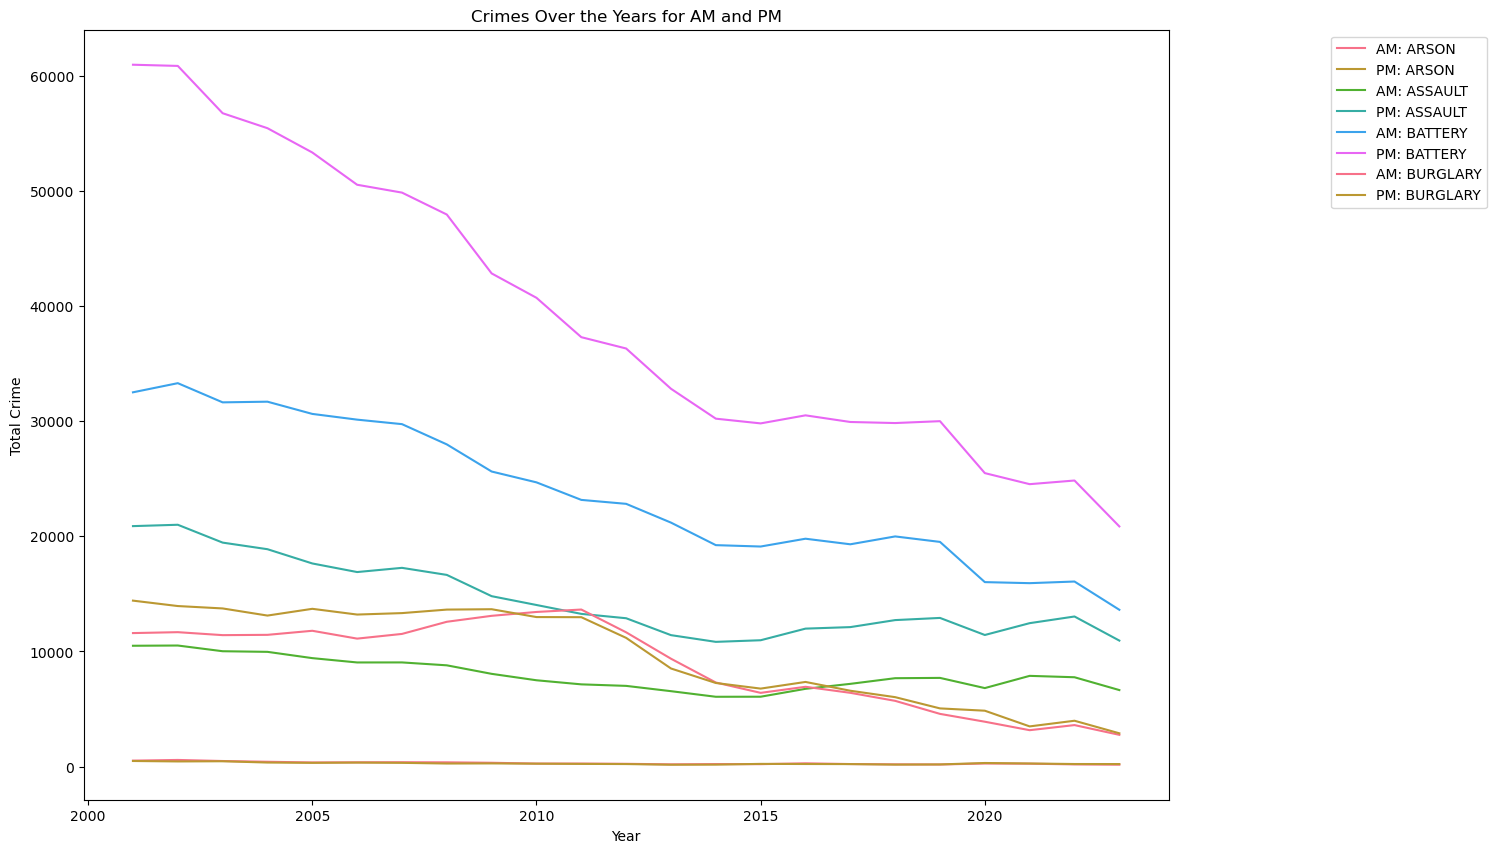

In [27]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Read the CSV file
data = pd.read_csv('endingData.csv')

# Step 3: Preprocess the data
# Extract the hour from the "Date" column
data['Hour'] = pd.to_datetime(data['Date']).dt.hour

# Define time intervals and specify the desired order
time_interval_order = ['AM: 01:00 - 12:00', 'PM: 01:00 - 12:00']

def get_time_interval(hour):
    if 1 <= hour <= 12:
        return 'AM: 01:00 - 12:00'
    else:
        return 'PM: 01:00 - 12:00'

data['Time Interval'] = data['Hour'].apply(get_time_interval)
data['Time Interval'] = pd.Categorical(data['Time Interval'], categories=time_interval_order, ordered=True)

# Group the data by "Year," "Primary Type," "Time Interval" and count occurrences
heatmap_data = data.groupby(['Year', 'Primary Type', 'Time Interval']).size().reset_index(name='Count')

# Pivot the data to create a 3D matrix for the heatmap
heatmap_matrix = heatmap_data.pivot_table(index=['Year', 'Time Interval'], columns='Primary Type', values='Count', aggfunc='sum')

# Create a line graph of row totals over the years for AM
line_data_am = heatmap_matrix[heatmap_matrix.index.get_level_values('Time Interval') == 'AM: 01:00 - 12:00'].groupby('Year').sum()
line_data_am.reset_index(inplace=True)

# Create a line graph of row totals over the years for PM
line_data_pm = heatmap_matrix[heatmap_matrix.index.get_level_values('Time Interval') == 'PM: 01:00 - 12:00'].groupby('Year').sum()
line_data_pm.reset_index(inplace=True)

# Create separate line graphs for each column (Primary Type)
plt.figure(figsize=(14, 10))
sns.set_palette("husl")  # Use a color palette
for column in heatmap_matrix.columns:
    if column != 'Row Total':
        sns.lineplot(data=line_data_am, x='Year', y=column, label=f'AM: {column}')
        sns.lineplot(data=line_data_pm, x='Year', y=column, label=f'PM: {column}')

plt.title('Crimes Over the Years for AM and PM')
plt.xlabel('Year')
plt.ylabel('Total Crime')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()


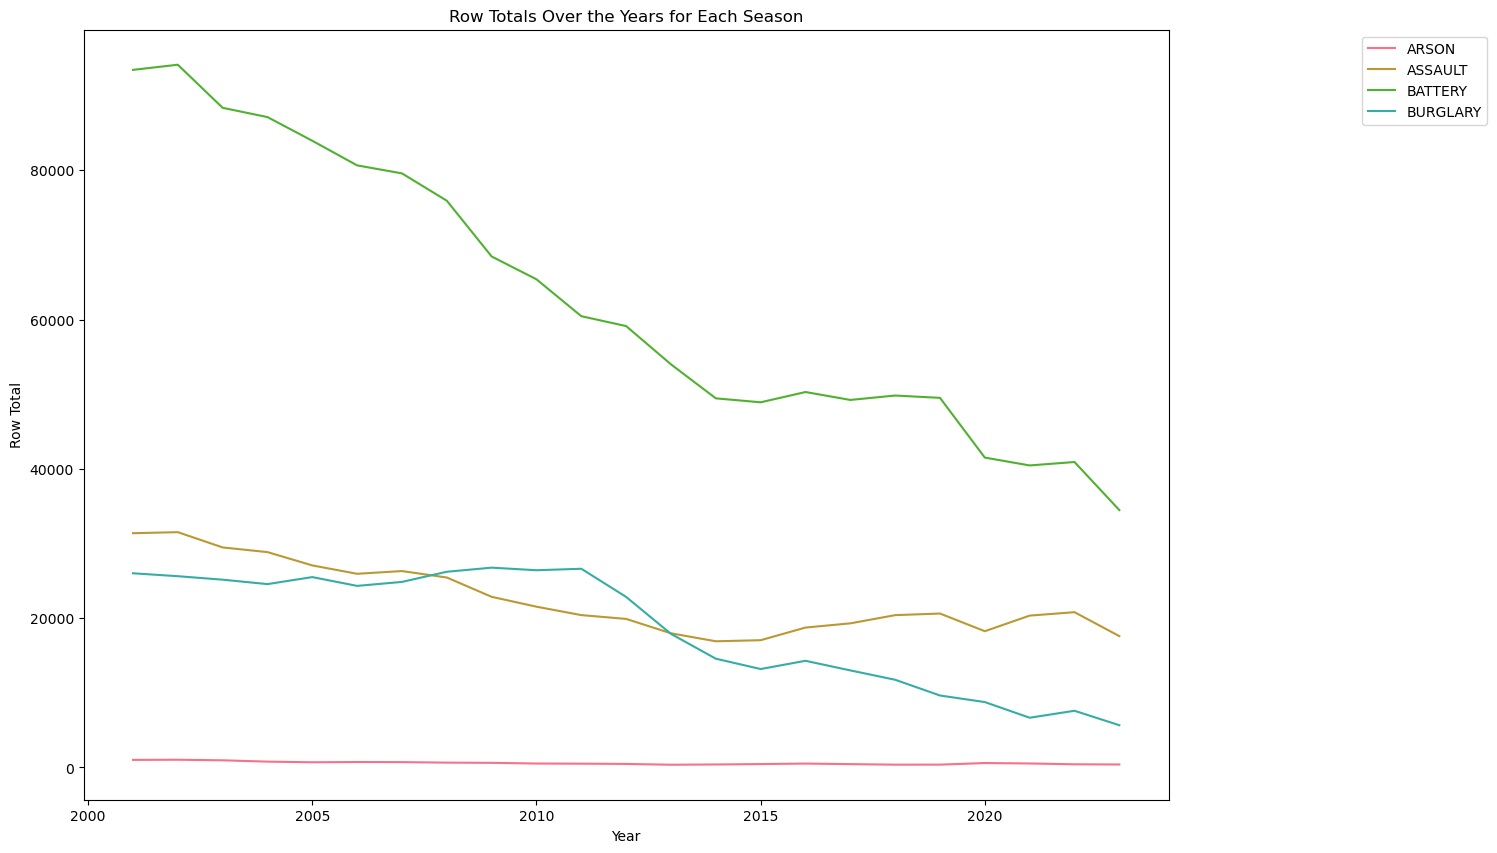

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Read the CSV file
data = pd.read_csv('endingData.csv')

# Step 3: Preprocess the data
# Extract the month from the "Date" column
data['Month'] = pd.to_datetime(data['Date']).dt.month

# Define the function to map months to seasons
def get_season(month):
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

data['Season'] = data['Month'].apply(get_season)

# Group the data by "Year," "Primary Type," and "Season" and count occurrences
heatmap_data = data.groupby(['Year', 'Primary Type', 'Season']).size().reset_index(name='Count')

# Pivot the data to create a 3D matrix for the heatmap
heatmap_matrix = heatmap_data.pivot_table(index=['Year', 'Season'], columns='Primary Type', values='Count', aggfunc='sum')

# Create a line graph of row totals over the years for each season
line_data = heatmap_matrix.groupby('Year').sum().reset_index()

# Create separate line graphs for each column (Primary Type)
plt.figure(figsize=(14, 10))
sns.set_palette("husl")  # Use a color palette
for column in heatmap_matrix.columns:
    sns.lineplot(data=line_data, x='Year', y=column, label=column)

plt.title('Row Totals Over the Years for Each Season')
plt.xlabel('Year')
plt.ylabel('Row Total')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.show()


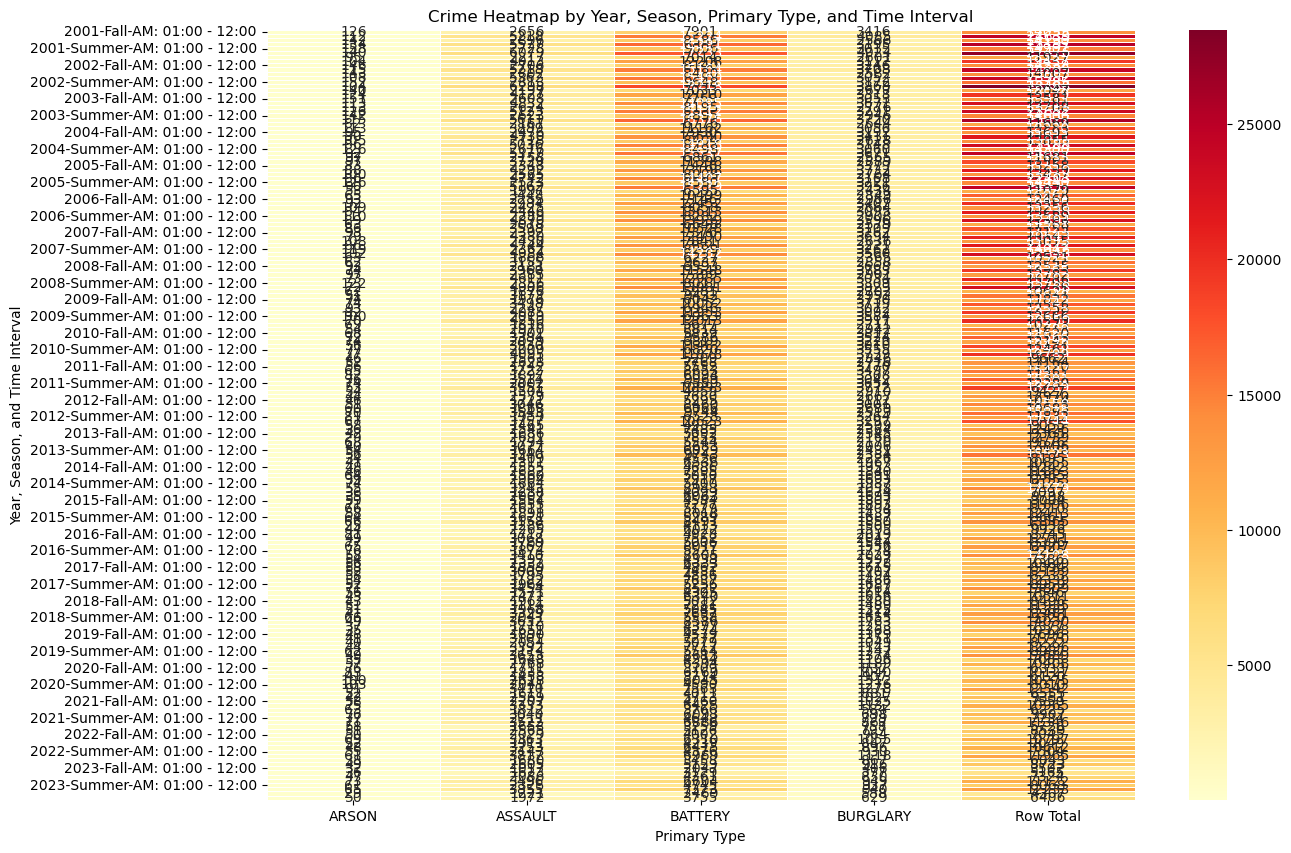

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Read the CSV file
data = pd.read_csv('endingData.csv')

# Step 3: Preprocess the data
# Extract the hour from the "Date" column
data['Hour'] = pd.to_datetime(data['Date']).dt.hour

# Define time intervals and specify the desired order
time_interval_order = ['AM: 01:00 - 12:00', 'PM: 01:00 - 12:00']

def get_time_interval(hour):
    if 1 <= hour <= 12:
        return 'AM: 01:00 - 12:00'
    else:
        return 'PM: 01:00 - 12:00'

data['Time Interval'] = data['Hour'].apply(get_time_interval)
data['Time Interval'] = pd.Categorical(data['Time Interval'], categories=time_interval_order, ordered=True)

# Function to get the season based on the date
def get_season(date):
    month = date.month
    day = date.day
    if (month == 12 and day >= 1) or (month in [1, 2]):
        return 'Winter'
    elif (month in [3, 4, 5]):
        return 'Spring'
    elif (month in [6, 7, 8]):
        return 'Summer'
    elif (month in [9, 10, 11]):
        return 'Fall'
    else:
        return 'Invalid'

data['Season'] = pd.to_datetime(data['Date']).apply(get_season)


# Group the data by "Year," "Season," "Primary Type," "Time Interval" and count occurrences
heatmap_data = data.groupby(['Year', 'Season', 'Primary Type', 'Time Interval']).size().reset_index(name='Count')

# Pivot the data to create a 3D matrix for the heatmap
heatmap_matrix = heatmap_data.pivot_table(index=['Year', 'Season', 'Time Interval'], columns='Primary Type', values='Count', aggfunc='sum')

# Calculate row totals and add them to the heatmap_matrix
heatmap_matrix['Row Total'] = heatmap_matrix.sum(axis=1)

# Step 4: Create the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_matrix, cmap='YlOrRd', linewidths=0.5, annot=True, fmt='d', cbar=True)
plt.title('Crime Heatmap by Year, Season, Primary Type, and Time Interval')
plt.xlabel('Primary Type')
plt.ylabel('Year, Season, and Time Interval')
plt.show()


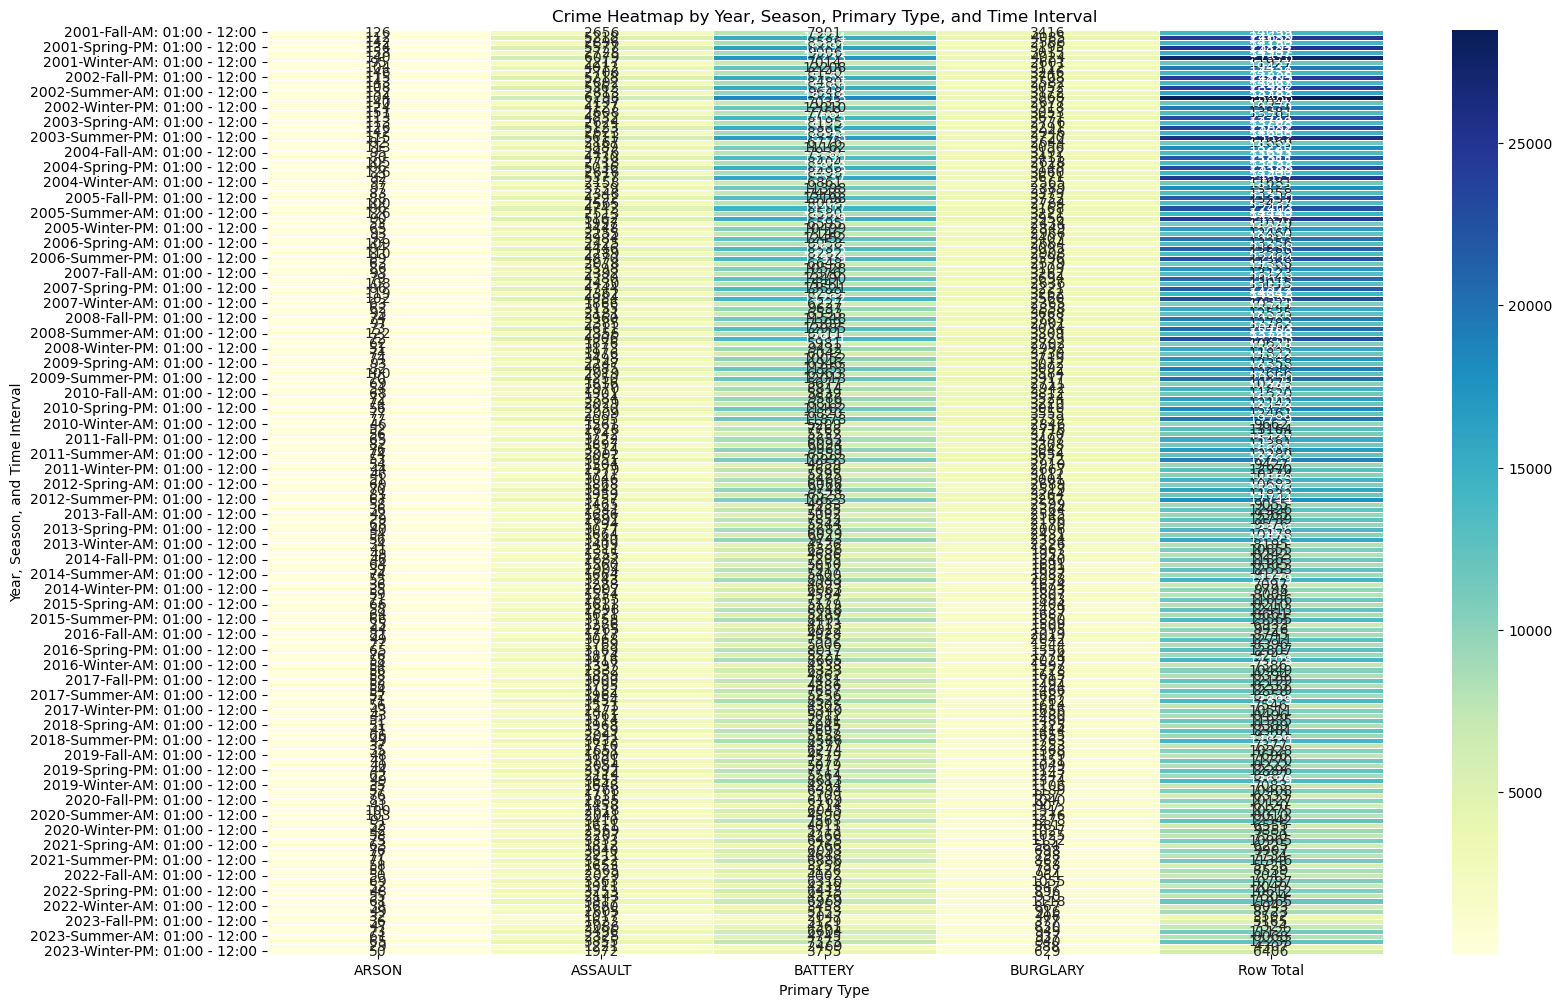

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Read the CSV file
data = pd.read_csv('endingData.csv')

# Step 3: Preprocess the data
# Extract the hour from the "Date" column
data['Hour'] = pd.to_datetime(data['Date']).dt.hour

# Define time intervals and specify the desired order
time_interval_order = ['AM: 01:00 - 12:00', 'PM: 01:00 - 12:00']

def get_time_interval(hour):
    if 1 <= hour <= 12:
        return 'AM: 01:00 - 12:00'
    else:
        return 'PM: 01:00 - 12:00'

data['Time Interval'] = data['Hour'].apply(get_time_interval)
data['Time Interval'] = pd.Categorical(data['Time Interval'], categories=time_interval_order, ordered=True)

# Function to get the season based on the date
def get_season(date):
    month = date.month
    day = date.day
    if (month >= 3 and month <= 5):
        return 'Spring'
    elif (month >= 6 and month <= 8):
        return 'Summer'
    elif (month >= 9 and month <= 11):
        return 'Fall'
    else:
        return 'Winter'

data['Season'] = pd.to_datetime(data['Date']).apply(get_season)

# Group the data by "Year," "Season," "Primary Type," "Time Interval" and count occurrences
heatmap_data = data.groupby(['Year', 'Season', 'Primary Type', 'Time Interval']).size().reset_index(name='Count')

# Pivot the data to create a 3D matrix for the heatmap
heatmap_matrix = heatmap_data.pivot_table(index=['Year', 'Season', 'Time Interval'], columns='Primary Type', values='Count', aggfunc='sum')

# Calculate row totals and add them to the heatmap_matrix
heatmap_matrix['Row Total'] = heatmap_matrix.sum(axis=1)

# Step 4: Create the heatmap
plt.figure(figsize=(18, 12))  # Adjust the figure size
sns.heatmap(heatmap_matrix, cmap='YlGnBu', linewidths=0.5, annot=True, fmt='d', cbar=True)
plt.title('Crime Heatmap by Year, Season, Primary Type, and Time Interval')
plt.xlabel('Primary Type')
plt.ylabel('Year, Season, and Time Interval')
plt.show()


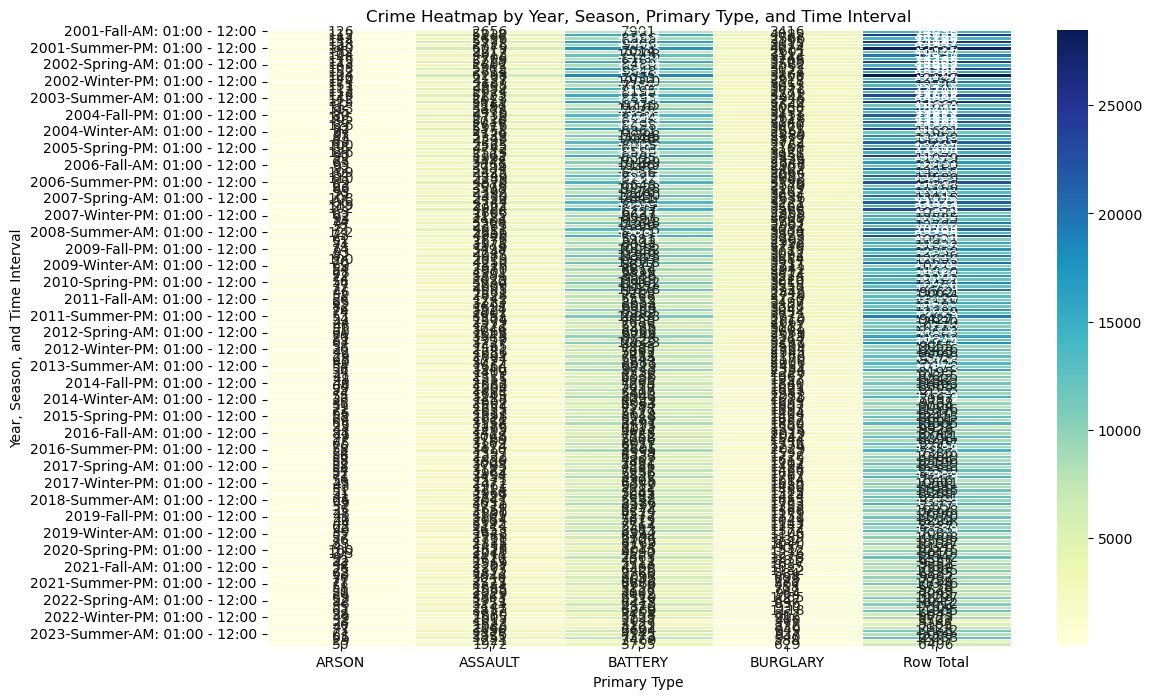

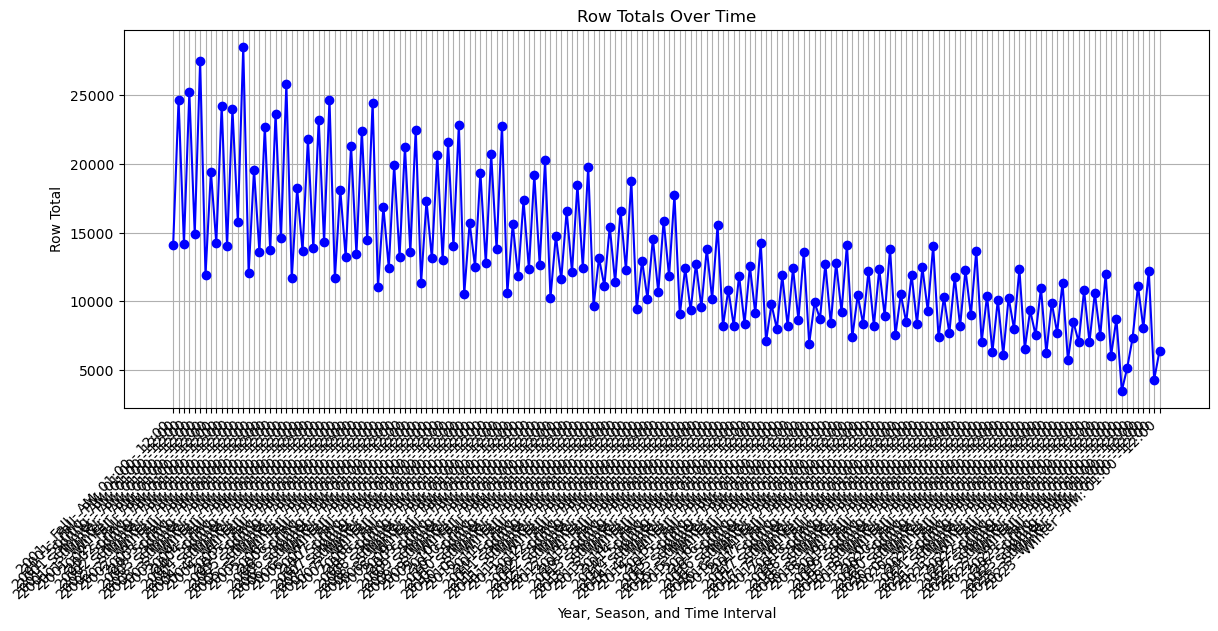

In [26]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 2: Read the CSV file
data = pd.read_csv('endingData.csv')

# Step 3: Preprocess the data
# Extract the hour from the "Date" column
data['Hour'] = pd.to_datetime(data['Date']).dt.hour

# Define time intervals and specify the desired order
time_interval_order = ['AM: 01:00 - 12:00', 'PM: 01:00 - 12:00']

def get_time_interval(hour):
    if 1 <= hour <= 12:
        return 'AM: 01:00 - 12:00'
    else:
        return 'PM: 01:00 - 12:00'

data['Time Interval'] = data['Hour'].apply(get_time_interval)
data['Time Interval'] = pd.Categorical(data['Time Interval'], categories=time_interval_order, ordered=True)

# Function to get the season based on the date
def get_season(date):
    month = date.month
    if 3 <= month <= 5:
        return 'Spring'
    elif 6 <= month <= 8:
        return 'Summer'
    elif 9 <= month <= 11:
        return 'Fall'
    else:
        return 'Winter'

data['Season'] = pd.to_datetime(data['Date']).apply(get_season)

# Group the data by "Year," "Season," "Primary Type," "Time Interval" and count occurrences
heatmap_data = data.groupby(['Year', 'Season', 'Primary Type', 'Time Interval']).size().reset_index(name='Count')

# Pivot the data to create a 3D matrix for the heatmap
heatmap_matrix = heatmap_data.pivot_table(index=['Year', 'Season', 'Time Interval'], columns='Primary Type', values='Count', aggfunc='sum')

# Calculate row totals and add them to the heatmap_matrix
heatmap_matrix['Row Total'] = heatmap_matrix.sum(axis=1)

# Step 4: Create the heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size
sns.heatmap(heatmap_matrix, cmap='YlGnBu', linewidths=0.5, annot=True, fmt='d', cbar=True, annot_kws={"size": 10})
plt.title('Crime Heatmap by Year, Season, Primary Type, and Time Interval')
plt.xlabel('Primary Type')
plt.ylabel('Year, Season, and Time Interval')

# Step 5: Create a line graph for row totals
row_totals = heatmap_matrix['Row Total']
years_season_time_intervals = row_totals.index
years_season_time_intervals_labels = [f'{year} - {season} - {time_interval}' for (year, season, time_interval) in years_season_time_intervals]

plt.figure(figsize=(14, 6))
plt.plot(years_season_time_intervals_labels, row_totals, marker='o', linestyle='-', color='b')
plt.title('Row Totals Over Time')
plt.xlabel('Year, Season, and Time Interval')
plt.ylabel('Row Total')
plt.xticks(rotation=45, ha='right')  # Rotate and spread out the labels
plt.subplots_adjust(bottom=0.25)  # Adjust the bottom margin for label visibility
plt.grid(True)

plt.show()
